<a href="https://colab.research.google.com/github/lmhonorio/ENE123-SED/blob/main/Aula_2_e_3_SED_Composicao_Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!sudo apt-get install graphviz libgraphviz-dev
#!pip install pygraphviz
#!pip install networkx

2D,3L
2D,3DD
2D,3DD
2D,3D
2D,3D
2D,3L
2D,3DD
2D,3DD
2D,3D
2D,3D
2DD,3L
2DD,3DD
2DD,3DD
2DD,3D
2DD,3D
2DD,3L
2DD,3DD
2DD,3DD
2DD,3D
2DD,3D
2L,3L
2L,3DD
2L,3DD
2L,3D
2L,3D
Menor caminho: ['2D,3D', '2D,3L', '2D,3DD', '2L,3DD', '2DD,3DD']
Distância do menor caminho: 4


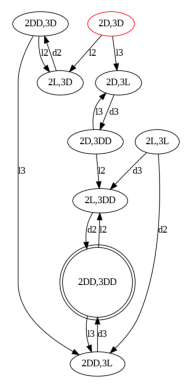

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.approximation as nx_app
from networkx.drawing.nx_agraph import to_agraph

arquivo = 'automatosinal.png'
arquivo2 = 'automatosinal2.png'


def xml_to_graph(graphxml):
    # Criar um grafo direcionado (DiGraph)
    G = nx.DiGraph(format='png', engine='dot')

    # Adicionar estados
    G.add_nodes_from(graphxml['states'])

    # Adicionar transições
    for transition, target_state in graphxml['transitions'].items():
        current_state, symbol = transition
        G.add_edge(current_state, target_state, label=symbol, weight=1)

    # Definir os estados finais
    for state in graphxml['accepting_states']:
        G.nodes[state]['accepting_state'] = True
        G.nodes[state]['shape'] = 'doublecircle'


    G.graph['start'] = graphxml['start']
    G.nodes[graphxml['start']]['color']='red'

    return G


def parallel_composition(automaton_A, automaton_B):
    parallel_automaton = nx.DiGraph()

    for state_A in automaton_A.nodes:
        for state_B in automaton_B.nodes:
            parallel_state = f'{state_A},{state_B}'
            parallel_automaton.add_node(parallel_state)

            if state_A == automaton_A.graph['start'] and state_B == automaton_B.graph['start']:
                parallel_automaton.graph['start'] = parallel_state
                parallel_automaton.nodes[parallel_state]['color'] = 'red'

                #automaton_A.nodes.
            k1 = automaton_B.nodes[state_B].get('accepting_state')
            k2 = automaton_A.nodes[state_A].get('accepting_state')


            if automaton_B.nodes[state_B].get('accepting_state') and automaton_A.nodes[state_A].get('accepting_state'):
                parallel_automaton.nodes[parallel_state]['shape'] = 'doublecircle'
                parallel_automaton.nodes[parallel_state]['accepting_state'] = 'true'

    sigmaA = list(set([label for (u_A, v_A, label) in automaton_A.edges(data='label')]))
    sigmaB = list(set([label for (u_A, v_A, label) in automaton_B.edges(data='label')]))

    for (u_A, v_A, label_A) in automaton_A.edges(data='label'):
        for (u_B, v_B, label_B) in automaton_B.edges(data='label'):

            paralelo_original = f'{u_A},{u_B}'
            parallel_uv = f'{u_A},{v_B}'
            parallel_vu = f'{v_A},{u_B}'
            print(paralelo_original)
            if label_A == label_B:
                parallel_vv = f'{v_A},{v_B}'
                parallel_automaton.add_edge(paralelo_original, parallel_vv, label=label_B)
            else:
                if not label_B in sigmaA:
                    parallel_automaton.add_edge(paralelo_original, parallel_uv, label=label_B)
                if not label_A in sigmaB:
                    parallel_automaton.add_edge(paralelo_original, parallel_vu, label=label_A)

    return parallel_automaton



dfa_sinal1 = {
    'alphabet': {'l1', 'd1'},
    'states': {'1D', '1L', '1DD'},
    'start': '1D',
    'accepting_states': {'1DD'},
    'transitions': {
        ('1D', 'l1'): '1L',
        ('1L', 'd1'): '1DD',
        ('1DD', 'l1'): '1L'
    }
}

dfa_sinal2 = {
    'alphabet': {'l2', 'd2', 'l3'},
    'states': {'2D', '2L', '2DD'},
    'start': '2D',
    'accepting_states': {'2DD'},
    'transitions': {
        ('2D', 'l3'): '2D',
        ('2DD', 'l3'): '2DD',
        ('2D', 'l2'): '2L',
        ('2L', 'd2'): '2DD',
        ('2DD', 'l2'): '2L'
    }
}

dfa_sinal3 = {
    'alphabet': {'l3', 'd3', 'l2'},
    'states': {'3D', '3L', '3DD'},
    'start': '3D',
    'accepting_states': {'3DD'},
    'transitions': {
        ('3D', 'l2'): '3D',
        ('3DD', 'l2'): '3DD',
        ('3D', 'l3'): '3L',
        ('3L', 'd3'): '3DD',
        ('3DD', 'l3'): '3L'
    }
}

G1 = xml_to_graph(dfa_sinal1)
G2 = xml_to_graph(dfa_sinal2)
G3 = xml_to_graph(dfa_sinal3)

agraph1 = to_agraph(G1)
agraph1.layout(prog='dot')
agraph1.draw(arquivo)

G = parallel_composition(G2, G3)
#G = parallel_composition(G, G3)
accepting_states = [node for node, data in G.nodes(data=True) if data.get('accepting_state')]

shortest_path = nx.shortest_path(G, source=G.graph['start'], target=accepting_states[0])
shortest_distance = nx.shortest_path_length(G, source=G.graph['start'], target=accepting_states[0])

print("Menor caminho:", shortest_path)  # Output: ['A', 'C', 'D', 'E']
print("Distância do menor caminho:", shortest_distance)  # Output: 7

# Converter o grafo NetworkX para um objeto AGraph
agraph = to_agraph(G)
agraph.layout(prog='dot')
agraph.draw(arquivo2)



# Exibir a imagem gerada usando Matplotlib
img = plt.imread(arquivo2)
plt.imshow(img)
plt.axis('off')
plt.show()

